In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
plt.style.use("fivethirtyeight")

In [ ]:
customer_df = pd.read_csv("/content/customer transaction.csv")
customer_df.head()

,customerid,gender,age,marital_status,income,jumlah transaksi,qty,total amount
0,422,1,21,Single,3.88,15,66,534500
1,185,1,30,Married,3.28,5,24,181900
2,64,1,48,Married,7.92,10,40,267900
3,264,1,21,Single,1.12,12,46,489200
4,380,0,40,Married,5.77,13,44,356700


In [ ]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        447 non-null    int64  
 1   gender            447 non-null    int64  
 2   age               447 non-null    int64  
 3   marital_status    444 non-null    object 
 4   income            447 non-null    float64
 5   jumlah transaksi  447 non-null    int64  
 6   qty               447 non-null    int64  
 7   total amount      447 non-null    int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 28.1+ KB


##**Explanatory Data Analysis**

In [ ]:
customer_df.describe()

,customerid,gender,age,income,jumlah transaksi,qty,total amount
count,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000
mean,224.000000,0.458613,39.782998,8.592103,11.230425,40.930649,362512.304251
std,129.182042,0.498842,12.848719,6.607065,3.245302,12.756679,124634.279184
min,1.000000,0.000000,0.000000,0.000000,3.000000,10.000000,92100.000000
25%,112.500000,0.000000,30.000000,4.175000,9.000000,32.000000,271750.000000
50%,224.000000,0.000000,39.000000,7.520000,11.000000,40.000000,354200.000000
75%,335.500000,1.000000,50.500000,10.810000,14.000000,50.000000,441200.000000
max,447.000000,1.000000,72.000000,71.300000,21.000000,79.000000,846700.000000


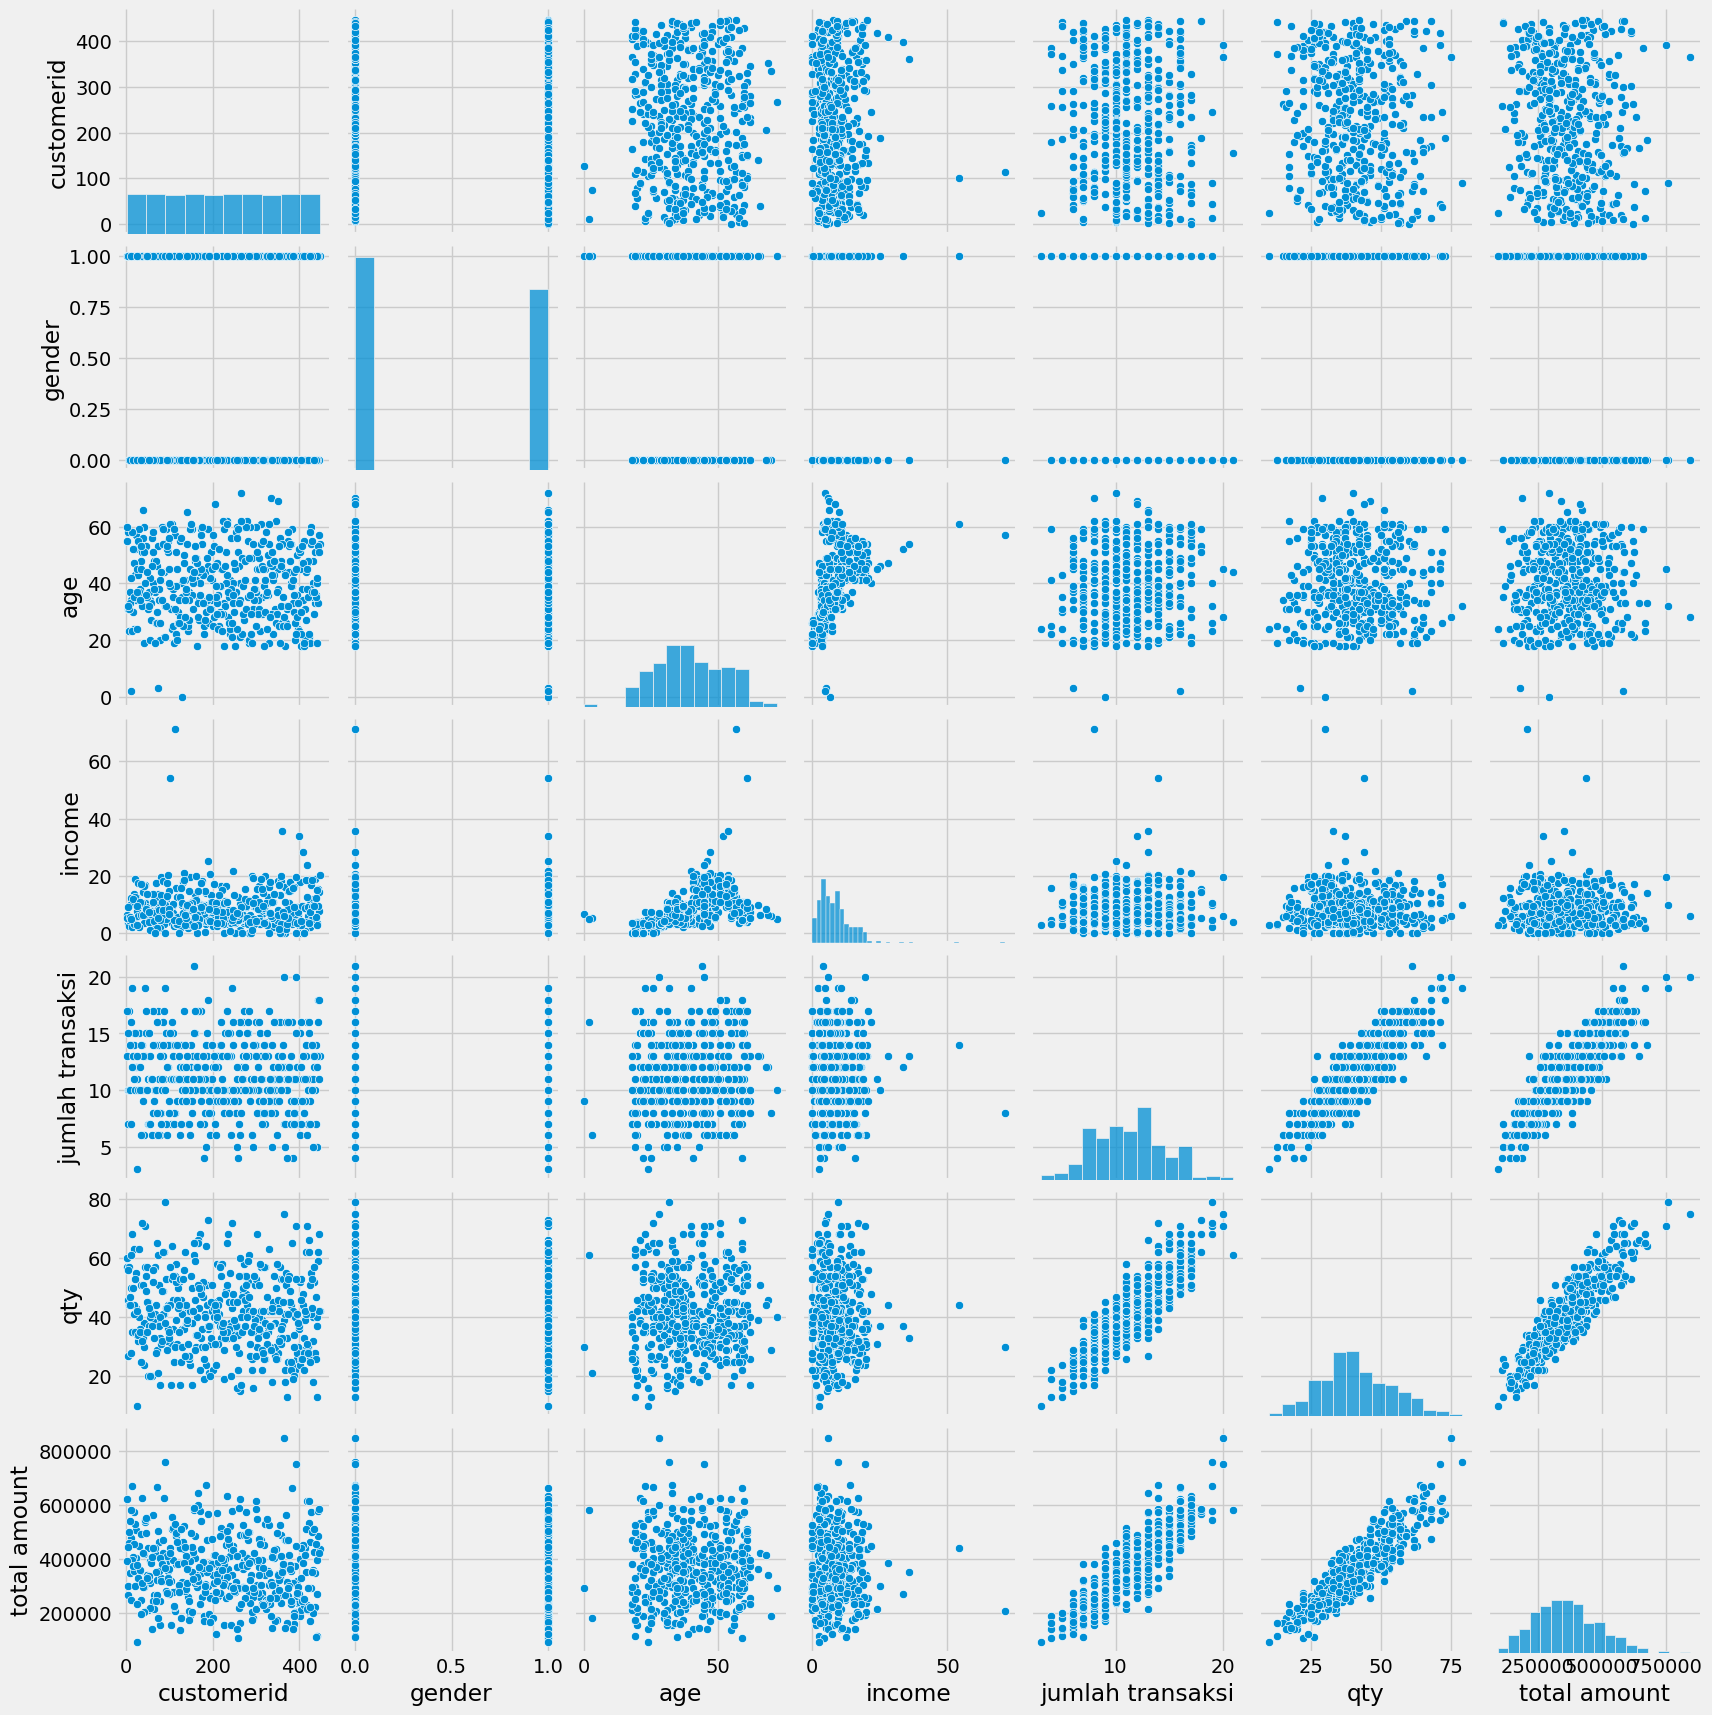

In [ ]:
sns.pairplot(customer_df)

**visualisasi distribusi umur customer**

<Axes: >

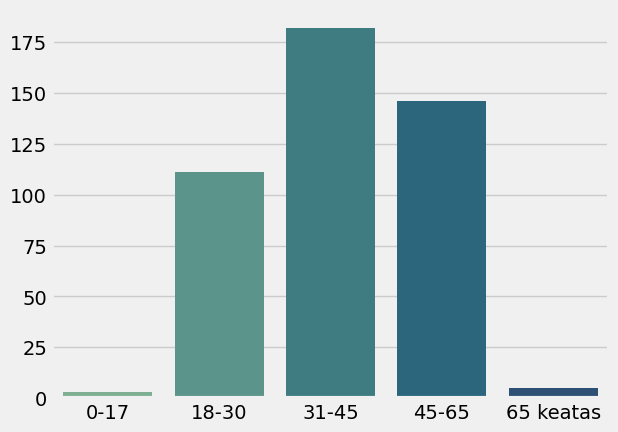

In [ ]:
age0_17 = customer_df[customer_df["age"]<=17]
age18_30 = customer_df[(customer_df["age"]>17) & (customer_df["age"]<=30)]
age31_45 = customer_df[(customer_df["age"]>30) & (customer_df["age"]<=45)]
age45_65 = customer_df[(customer_df["age"]>45) & (customer_df["age"]<=65)]
age_65_above= customer_df[(customer_df["age"]>65) ]

x = ["0-17","18-30","31-45","45-65","65 keatas"]
y = [len(age0_17),len(age18_30),len(age31_45),len(age45_65),len(age_65_above)]

sns.barplot(x=x,y=y,palette='crest')

<ipython-input-589-33100273d1da>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customer_df["age"])


<Axes: xlabel='age', ylabel='Density'>

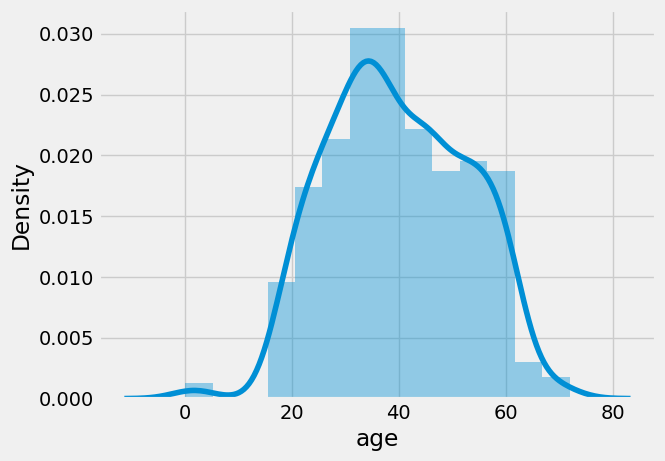

In [ ]:
sns.distplot(customer_df["age"])

<ipython-input-588-575655888c7f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customer_df["income"])


<Axes: xlabel='income', ylabel='Density'>

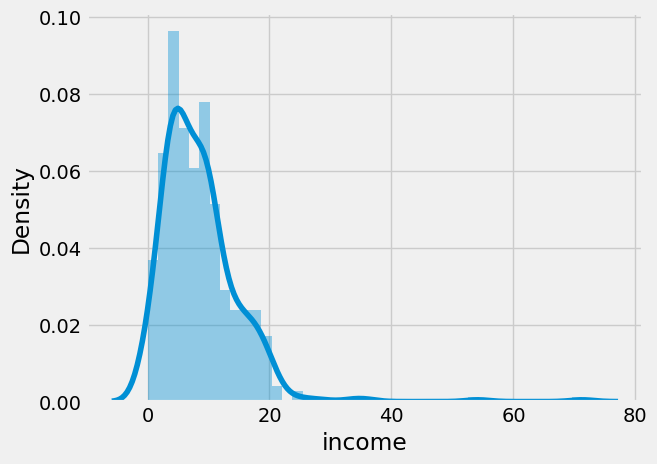

In [ ]:
sns.distplot(customer_df["income"])

Dari plot distribusi data dapat dilihat bahwa terdapat oultier pada kolom income dan kolom age

<ipython-input-234-3c423d564e7a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(customer_df.corr(),annot=True,cmap='crest')


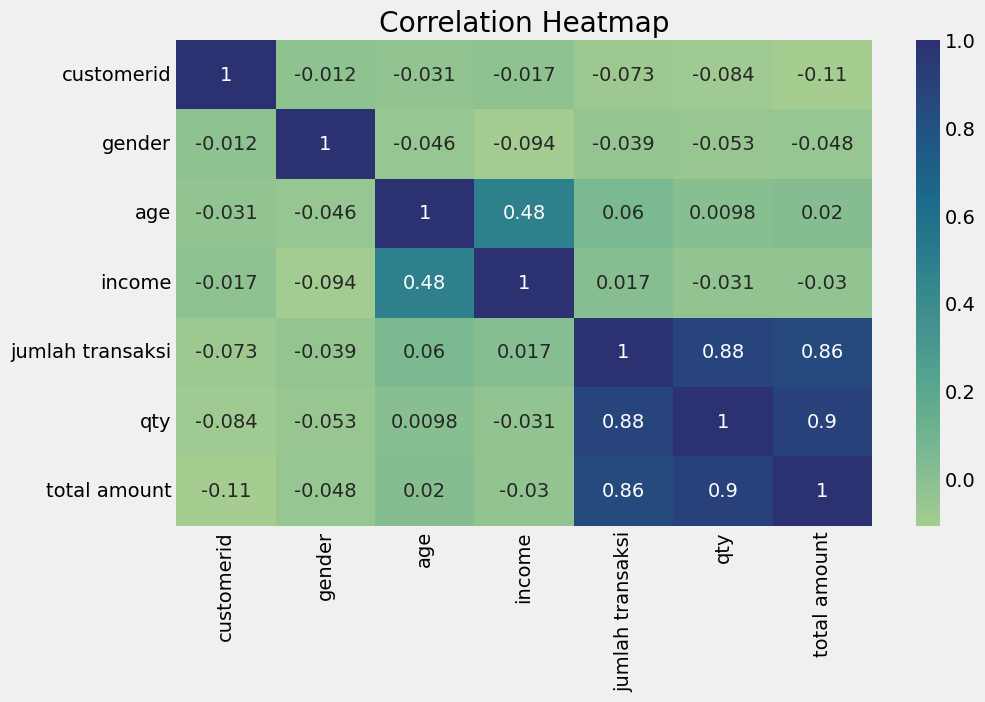

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(customer_df.corr(),annot=True,cmap='crest')
plt.title("Correlation Heatmap")
plt.yticks(rotation=0)
plt.show()

## Data Preprocessing

- melakukan data preprocessing yaitu menghapus outlier menghapus data non numerik, dan memilih fitur yang akan dipakai untuk training model

In [ ]:
customer_df_preprocess = customer_df.copy()

**Menghapus outlier pada kolom income**

In [ ]:
q_low = customer_df_preprocess["income"].quantile(0.01)
q_hi  = customer_df_preprocess["income"].quantile(0.99)

customer_df_preprocess = customer_df_preprocess[(customer_df_preprocess["income"]<q_hi)&(customer_df_preprocess["income"]>q_low)]


In [ ]:
non_numerical_columns = ["marital_status"]
customer_df_preprocess .drop(non_numerical_columns,inplace=True,axis=1)
#data untuk training model
x = customer_df_preprocess[["income","total amount"]]

<ipython-input-641-35c6b124ea61>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_df_preprocess .drop(non_numerical_columns,inplace=True,axis=1)


## Building Customer Segmentation Model

 1.pertama menentukan jumlah kluster yang ideal menggunakan metode within cluster sum of squares (wcss) dan elbow method

###Melakukan pengelompokan berdasarkan umur customer###

In [ ]:

wcss = []
for i in range(1,11):
  kmeans_pca = KMeans(n_clusters=i,init= 'k-means++',random_state=42)
  kmeans_pca.fit(x)
  wcss.append(kmeans_pca.inertia_)
print(wcss)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[6743163314925.904, 2367133551523.7974, 1198056367716.7378, 745971547580.0837, 488676862733.4607, 366267268600.5232, 264640194840.34204, 204111612906.3139, 161898640404.80176, 130565833150.58931]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


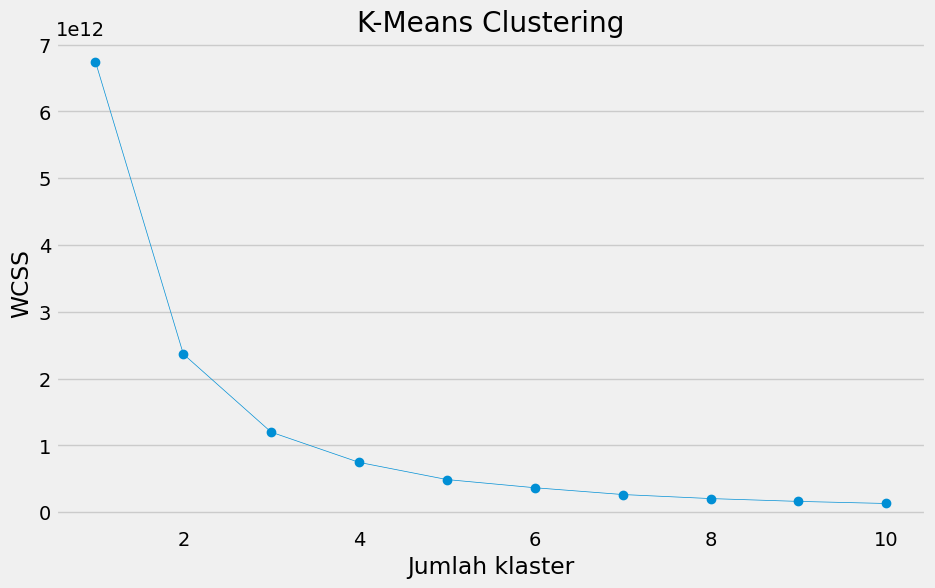

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),wcss,marker='o',linestyle="-",linewidth=0.5)
plt.xlabel("Jumlah klaster")
plt.ylabel("WCSS")
plt.grid(axis='x')
plt.title("K-Means Clustering")
plt.show()

**dari grafik diatas dapat dilihat bahwa pada n_cluster = 3, garis mulai turun secara melandai**

In [ ]:
kmeans_model1=KMeans(n_clusters=3,init='k-means++',random_state=42)
kmeans_model1.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [ ]:
df_seg_kmeans = customer_df_preprocess.copy()
df_seg_kmeans["Segment K-means"] = kmeans_model1.labels_

In [ ]:
df_seg_kmeans.groupby("Segment K-means").mean()

,customerid,gender,age,income,jumlah transaksi,qty,total amount
Segment K-means,,,,,,,
0,244.993827,0.493827,39.833333,8.645802,8.432099,29.746914,240438.271605
1,204.564972,0.435028,40.813559,8.420452,11.728814,42.757062,383454.237288
2,209.839080,0.436782,40.517241,8.348851,15.321839,58.195402,549855.172414


In [ ]:
df_seg_kmeans["Segment K-means"].replace({0:"Low spender",1:"Medium spender",2:"High spender"},inplace=True)

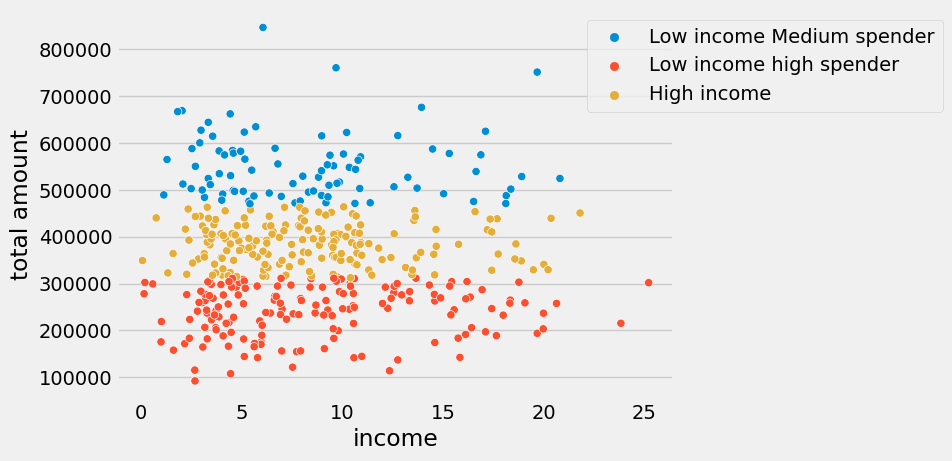

In [ ]:
sns.scatterplot(x=df_seg_kmeans["income"],y=df_seg_kmeans["total amount"],hue=df_seg_kmeans["Segment K-means"])
plt.legend(bbox_to_anchor=(1.5,1))
plt.grid(axis="x")